In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [36]:
data = pd.read_csv('CourseraDataset-Clean.csv')
data.head()

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100
2,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Not specified,Not specified,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0,227
3,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0,0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0,582


In [38]:
#check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Course Title                       0
Rating                             0
Level                              0
Schedule                           0
What you will learn                0
Skill gain                         0
Modules                           33
Instructor                        88
Offered By                         0
Keyword                            0
Course Url                         0
Duration to complete (Approx.)     0
Number of Review                   0
dtype: int64


In [41]:
#data types
# data.info()

# no of uniques
for i in data.columns:
    print(i,data[i].nunique())

Course Title 6081
Rating 22
Level 4
Schedule 2
What you will learn 3010
Skill gain 3697
Modules 5688
Instructor 3524
Offered By 395
Keyword 10
Course Url 6093
Duration to complete (Approx.) 109
Number of Review 1860


In [45]:
data_reduced = data[['Rating','Level','Schedule','Duration to complete (Approx.)','Number of Review']]
data_reduced.head()

,Rating,Level,Schedule,Duration to complete (Approx.),Number of Review
0,4.8,Beginner level,Flexible schedule,20.0,2813
1,4.4,Beginner level,Flexible schedule,34.0,100
2,4.5,Beginner level,Flexible schedule,9.0,227
3,0.0,Beginner level,Flexible schedule,8.0,0
4,4.8,Beginner level,Flexible schedule,11.0,582


In [46]:
#label encoding the categorical values
le = LabelEncoder()
data_reduced.Level =le.fit_transform(data_reduced.Level)
data_reduced.Schedule = le.fit_transform(data_reduced.Schedule)

C:\Users\ferdy\AppData\Local\Temp\ipykernel_12636\1991692424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced.Level =le.fit_transform(data_reduced.Level)
C:\Users\ferdy\AppData\Local\Temp\ipykernel_12636\1991692424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced.Schedule = le.fit_transform(data_reduced.Schedule)


In [49]:
#standard scaling
scaler = StandardScaler()
numerical_features =['Duration to complete (Approx.)','Number of Review']
data_reduced[numerical_features]= scaler.fit_transform(data[numerical_features])

data_reduced.head()


C:\Users\ferdy\AppData\Local\Temp\ipykernel_12636\2161959695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced[numerical_features]= scaler.fit_transform(data[numerical_features])


,Rating,Level,Schedule,Duration to complete (Approx.),Number of Review
0,4.8,1,0,-0.231745,0.074892
1,4.4,1,0,0.119157,-0.189411
2,4.5,1,0,-0.507453,-0.177039
3,0.0,1,0,-0.532517,-0.199153
4,4.8,1,0,-0.457324,-0.142454


Text(0.5, 1.0, 'histogram plot')

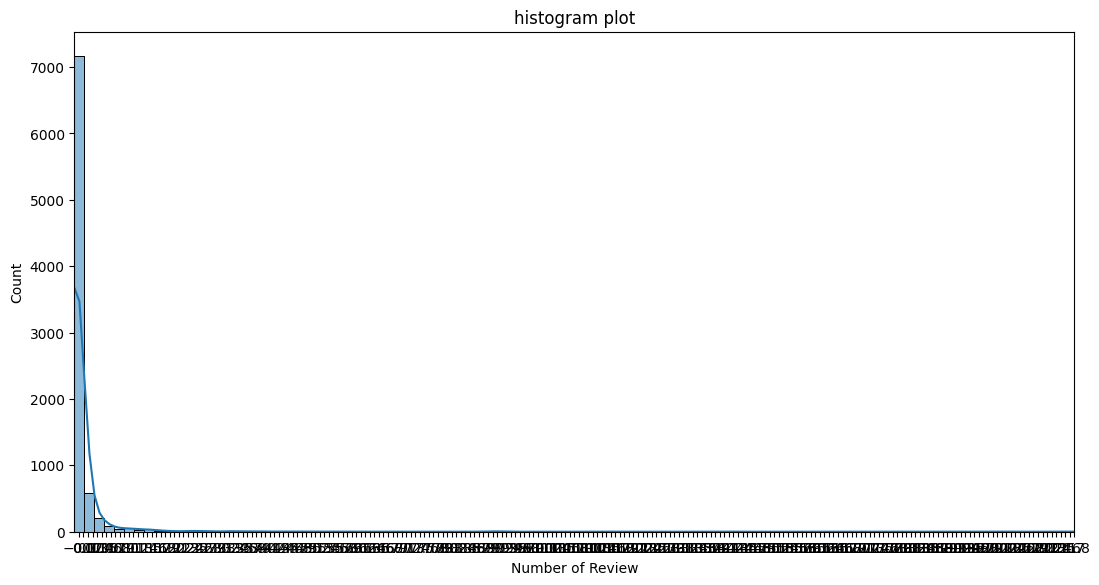

In [58]:
import seaborn as sns
import matplotlib.ticker as tik

fig = plt.figure(figsize=(10,5))
ax=fig.add_axes([1,1,1,1])
ax.xaxis.set_major_locator(tik.MultipleLocator(0.1))
plt.xlim(data_reduced['Number of Review'].min(),data_reduced['Number of Review'].max())
sns.histplot(data_reduced['Number of Review'],bins=100,kde=True)
plt.title('histogram plot')


### 